## 1. 분류(Classification)의 개요

분류(Classification)은 지도학습의 대표적인 유형으로 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신 러닝 알고리즘으로 학습해 모델을 생성하고, 새로운 데이터 값이 주어졌을 때 모델에 따라 미지의 레이블 값을 예측하는 것입니다. 이 장에서는 분류의 다양한 알고리즘 중 앙상블 방법과 `XgBoost`, `LightGBM`, 스태킹 기법 등을 다룹니다.

## 2. 결정 트리
결정 트리(Decision Tree)는 ML 알고리즘 중 가장 직관적으로 이해하기 쉬운 알고리즘입니다. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것입니다. 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우합니다.
결정 트리는 다음 그림과 같이 규칙 노드 (Decision Node)로 표시된 규칙 조건과, 리프 노드 (Leaf Node)로 클래스 값으로 이루어집니다. 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생상됩니다. 

트리의 깊이(depth)가 깊어질수록 분류를 결정하는 방식이 더욱 복잡해진다는 뜻이며, 과적합으로 인해 트리의 예측 성능이 저하될 가능성이 높습니다. 따라서 가능한 적은 결정 노드로 높은 예측 정확도를 가질 수 있어야 하며, 이를 위해서는 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요합니다.

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있ㅎ도록 규칙 조건을 만듭니다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있는 조건을 찾아 서브 데이터 세트를 만들고, 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하여 데이터 값을 예측합니다. 이러한 정보 균일도를 측정하는 대표적인 방법으로 엔트로피를 이용한 정보 이득 (Information Gain)지수와 지니 계수가 있습니다. 

정보 이득 지수는 1 - 엔트로피 지수로, 데이터가 집합의 혼잡도가 높을수록 낮은 값을 갖게 됩니다. 따라서 결정 트리는 정보 이득이 높은 속성을 기준으로 분할합니다.

지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수로, 0이 가장 평등하고 1로 갈수록 불평등합니다. 머신 러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할합니다.
사이킷 런에서 결정 트리 알고리즘을 구현한 `DecisionTreeClassifier`는 기본적으로 지니 계수를 이용해 데이터 세트를 분할합니다.


### 2.1. 결정 트리 모델의 특징

결정 트리의 장점은 알고리즘이 쉽고 직관적이라는 것입니다. 균일도를 기반으로 룰이 매우 명확하고, 규칙 노드와 리프 노드가 어떻게 만들어지는지를 알 수 있으며 시각화가 가능합니다. 또, 균일도를 기준으로 하기 때문에 피처 스케일링이나 정규화와 같은 전처리가 필요 없습니다.
단, 과적합으로 정확도가 떨어진다는 단점이 존재합니다. 이를 극복하기 위해서는 트리의 크기를 사전에 제한할 필요가 있습니다.

### 2.2. 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 분류 클래스 `DecisionTreeClassifier`와 회귀 클래스 `DecisionTreeRegressor`를 제공합니다. 두 클래스는 파라미터로 `min_samples_split`, `min_samples_leaf`, `max_features`, `max_depth`, `max_leaf_nodes`를 사용합니다.

`min_samples_split` 파라미터는 노드를 분할하기 위한 최소한의 샘플 데이터 수를, `min_samples_leaf`는 말단 노드가 되기 위한 샘플 데이터의 수를 의미합니다. 작게 설정할수록 과적합 가능성이 증가하기 때문에 주의하여야 할 필요가 있습니다.
`max_features` 파라미터는 최적의 분할을 위해 고려할 최대 피처 개수를 의미합니다. 이때 알아둘 점은 `int`형으로 대상 피처의 개수를 지정하거나, `float`형으로 전체 피처 중 대상 피처의 퍼센트를 지정할 수 있습니다. 숫자를 입력하지 않고 `sqrt`, `auto` 를 입력하면 sqrt(전체 피처의 개수)를, `log`를 입력하면 log2(전체 피처의 개수) 를 지정할 수 있습니다.
`max_leaf_nodes`는 말단 노드의 최대 개수를 의미합니다.

### 2.3. 결정 트리 모델의 시각화

`Graphviz` 패키지를 활용하면 생성된 결정 트리를 시각적으로 볼 수 있습니다. 사이킷런의 `export_graphviz()` 에 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 트레 형태로 시각화해 보여줍니다.
붓꽃 데이터 세트에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지를 시각화해 보겠습니다.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data= load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True)

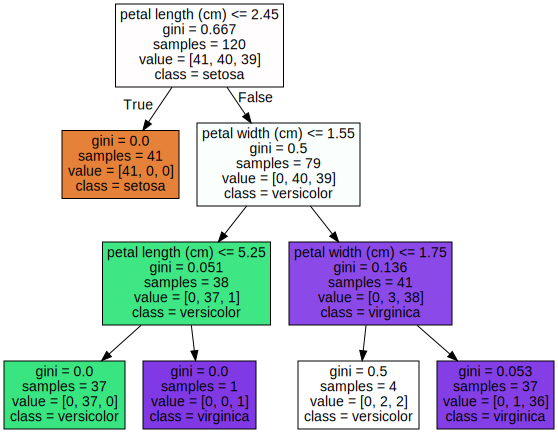

In [4]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

결과를 보면 한눈에 각 규칙에 따른 트리의 브랜치 노드와 말단 리프 노드가 어떻게 구성되어 있는지를 살펴볼 수 있습니다. 각 노드의 지니 계수, 분류 결과, 샘플의 개수와 레이블별 샘플의 개수를 확인할 수 있습니다.

결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 조건입니다. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 더 간결하고 이상치에 강하도록 만들 수 있기 때문입니다. `DecisionTreeClassifier` 객체의 `feature_importances_` 속성을 통해 각 피처의 중요도를 확인할 수 있습니다. 위 예제에서 각 피처별 중요도 값을 막대그래프로 표현해 보겠습니다.

Feature importances:
[0.    0.    0.558 0.442]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<AxesSubplot:>

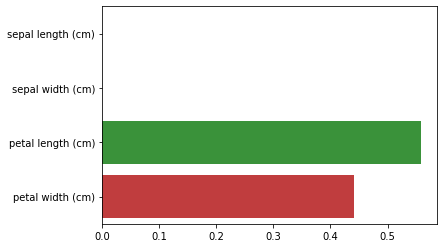

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature imporance 를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y= iris_data.feature_names)

두 개의 피처 `petal lenght` 와 `petal width` 만을 기준으로 분류가 이루어지고 있으며, `petal length`의 중요도가 더 크다는 것을 확인할 수 있습니다.

### 2.4. 결정 트리 과적합 (Overfitting)

이상치에 크게 반응하는, 제한이 없는 결정 트리 모델을 사용하게 되면 데이터 분류를 위해 트리의 분할이 자주 일어나게 되어 결정 기준 경계가 매우 많아지게 됩니다. 이러한 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 크게 떨어지게 됩니다. 따라서 파라미터를 적절하게 조절해 과적합을 방지하면서 정확도가 높은 모델을 구성할 필요가 있습니다.


### 2.5. 결정 트리 실습- 사용자 행동 인식 데이터 세트

UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 인식 데이터세트에 대한 예측 분류를 수행해 보겠습니다.

[데이터 출처](http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

우선 `DataFrame`을 로드하기 위해 함수 `get_human_dataset()`을 작성하겠습니다. 중복된 피처명이 있기 때문에 이를 해결하기 위해 함수 `get_new_feature_name()`을 사용합니다. 


In [9]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset():

    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()


In [18]:
print('## 학습 피처 데이터셋 info')
print(X_train.info())
print('\n ## 레이블 값 분포')
print(y_train['action'].value_counts())

## 학습 피처 데이터셋 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None

 ## 레이블 값 분포
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


`DecisionTreeClassifier`를 이용해 동작 예측 분류를 수행해 보고, 이때의 하이퍼 파라미터 값을 추출해 보겠습니다.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred= dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


`max_depth` 와 `min_samples_split`을 같이 변경하면서 정확도 성능을 튜닝해 보겠습니다.

In [20]:
from sklearn.model_selection import GridSearchCV

params= {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [21]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


결정 트리에서 각 피처의 중요도를 알아보겠습니다.

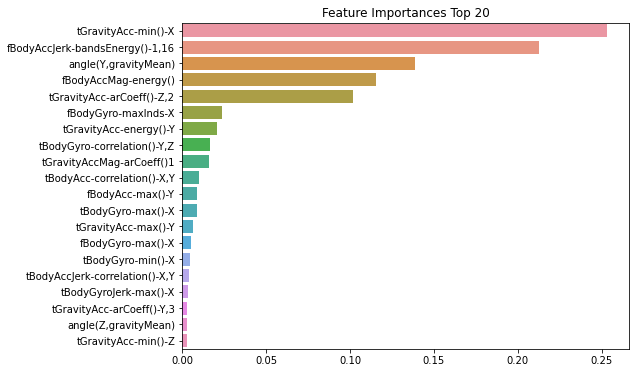

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

가장 높은 중요도를 가진 5개의 피처들이 매우 중요하게 트리 규칙에 영향을 미친다는 것을 알 수 있습니다.

## 3. 앙상블 학습

### 3.1. 앙상블 학습 개요

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법입니다. 랜덤포레스트, 그래디언트 부스팅, XGBoost, LightGBM 등의 다양한 알고리즘이 있으며 쉽고 편리하면서도 강력한 성능을 자랑합니다.

앙상블 학습의 유형은 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)의 세 가지로 나눌 수 있으며, 이 외에도 스태킹 등이 존재합니다. 보팅과 배깅은 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식으로, 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하는 것인 반면 배깅은 같은 알고리즘 기반이지만 데이터 샘플링을 다르게 가져가면서 학습을 수행한 분류기로 보팅을 수행하는 것을 말합니다. 부스팅은 여러 분류기가 순차적으로 학습을 수행한 뒤, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것입니다. 스태킹은 여러 가지 다른 모텔의 예측 결과값을 다시 학습 데이터로 만들어 메타 모델로 재학습시켜 결과를 예측하는 방법입니다.

### 3.2. 보팅 유형 - 하드 보팅 (Hard Voting)과 소프트 보팅 (Soft Voting)
보팅 방법에는 두 가지, 하드 보팅과 소프트 보팅이 있습니다. 하드 보팅을 이용한 분류(Classification)는 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정하는 반면, 소프트 보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 평균해 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정합니다.

### 3.3. 보팅 분류기
사이킷런은 보팅 방식의 앙상블을 구현한 `VotingClassfifier` 클래스를 제공하고 있습니다.
보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측해 보겠습니다. 로지스틱 화귀와 KNN을 기반으로 한 보팅 분류기를 만들어 보겠습니다.

In [28]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
data_df= pd.DataFrame(cancer.data, columns=cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)


lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)
vo_clf=VotingClassifier( estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred=classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name,accuracy_score(y_test, pred)))



Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


Voting 분류기의 정확도가 로지스틱 회귀와 KNN을 기반으로 한 분류기보다 높게 나온 것을 확인할 수 있습니다.

## 4. 랜덤 포레스트

### 4.1. 랜덤 포레스트의 개요 및 실습
배깅(bagging)은 앞에서 소개한 보팅과는 다르게, 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘입니다. 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하는 알고리즘입니다.

랜덤 포레스트의 개별 트리가 학습하는 데이터 세트는 여러 개의 데이터 세트를 중첩되기 분리하는 부트스트래핑(bootstrapping) 분할 방식을 통해 만들어집니다.

사이킷런의 `RandomForestClassifier`클래스를 통해 랜덤 포레스트 기반의 분류를 수행할 수 잇습니다. 앞의 사용자 행동 인식 데이터 세트에 `RandomForestClassifier`를 적용해 보겠습니다.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy= accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 4.2. 랜덤 포레스트 하이퍼 파라미터 및 튜닝

랜덤 포레스트에는 결정 트리에서 사용되는 파라미터 외에 결정 트리의 개수를 지정하는 `n_estimators`파라미터가 있습니다. 트리의 개수를 늘릴수록 좋은 성능을 기대할 수 있지만 무조건 성능이 향상되는 것은 아니며, 학습 수행 시간이 오래 걸리는 것도 감안해야 합니다.

`GridSearchCV`를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝해 보겠습니다. 

In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv= GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was pa

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


`n_estimators`를 300으로 증가시키고, 최적화 하이퍼 파라미터로 다시 `RandomForestClassifier`를 학습시킨 뒤 별도의 테스트 데이터 세트에서 예측 성능을 측정해 보겠습니다.

In [31]:
rf_clf1= RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred= rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


`feature_importances_`속성을 이용해 알고리즘이 선택한 피처의 중요도를 시각화 해보겠습니다.

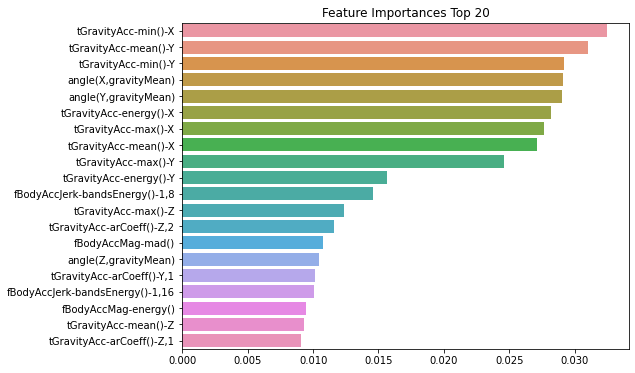

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

중요 피처들과 중요도를 확인할 수 있습니다.